# Headline Analysis Example (assignment one)
[J. Nathan Matias](https://natematias.com), [COMM 4940](https://natematias.com/courses/comm4940/) (Jan 2020)

This code includes an analysis example for the [Week 2 Headline Experiment](https://github.com/natematias/design-governance-experiments/tree/master/assignments/1-headline-experiment).


In [138]:
## LOAD LIBRARIES
library(ggplot2) ## FOR PLOTS
library(gmodels) ## FOR CrossTable

## SET GGPLOT TO USE WIDE BUT NOT TOO TALL PLOTS
options(repr.plot.width=6, repr.plot.height=4)

In [139]:
# load participants file
participants     <- read.csv("headline-experiment-impressions.csv")
# convert headline to a factor, to simplify analysis later on
participants$hed <- factor(participants$hed)
# relevel the factors so that the 4th headline is the "reference factor" for the regression model
participants$hed <- relevel(participants$hed, ref="4", data=participants)


headlines        <- read.csv("headline-experiment-heds.csv")

### Show Headlines

In [140]:
headlines

id,hed
1,"She's Not Just Destined For Greatness, She's Destined To Do Great Things For Women"
2,This Young Woman Just Took Silicon Valley By Storm And She's Not Stopping There
3,Feminism 101: This Girl Is Going Places And She's Taking Other Girls With Her
4,Remember When Math Was Too Hard For The Ladies? Not So Much.


### Show a CrossTable of the Data

In [141]:
CrossTable(participants$hed, participants$click, 
           prop.r =FALSE, prop.c=TRUE, prop.t=FALSE,prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  14950 

 
                 | participants$click 
participants$hed |         0 |         1 | Row Total | 
-----------------|-----------|-----------|-----------|
               4 |      3720 |        17 |      3737 | 
                 |     0.251 |     0.143 |           | 
-----------------|-----------|-----------|-----------|
               1 |      3716 |        40 |      3756 | 
                 |     0.251 |     0.336 |           | 
-----------------|-----------|-----------|-----------|
               2 |      3670 |        24 |      3694 | 
                 |     0.247 |     0.202 |           | 
-----------------|-----------|-----------|-----------|
               3 |      3725 |        38 |      3763 | 
                 |     0.251 |     0.319 |           | 
-----------------|-----------|-----------|-----------|
    Col

### Estimate Results With Confidence Intervals

In [142]:
summary(result.lm <- lm(click ~ hed, data=participants))


Call:
lm(formula = click ~ hed, data = participants)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01065 -0.01010 -0.00650 -0.00455  0.99545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.004549   0.001453   3.130  0.00175 **
hed1        0.006101   0.002053   2.972  0.00296 **
hed2        0.001948   0.002061   0.945  0.34465   
hed3        0.005549   0.002052   2.705  0.00684 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08884 on 14946 degrees of freedom
Multiple R-squared:  0.0008112,	Adjusted R-squared:  0.0006106 
F-statistic: 4.045 on 3 and 14946 DF,  p-value: 0.006954


In [143]:
estimate.df <- data.frame(hed=factor(c(1,2,3,4)))

preds.df <- data.frame(predict(result.lm, estimate.df, se.fit=TRUE, interval="confidence")$fit)

estimate.df$estimate <- preds.df$fit
estimate.df$estimate.lwr <- preds.df$lwr
estimate.df$estimate.upr <- preds.df$upr

### Plot Results using ggplot

In [144]:
print(paste("max estimate:", max(estimate.df$estimate.upr)))

[1] "max estimate: 0.013490945437187"


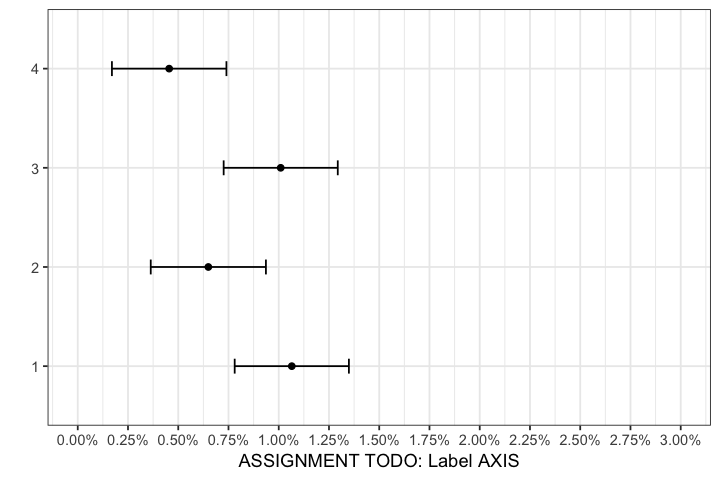

In [145]:
ggplot(estimate.df, aes(estimate.df$hed, estimate)) +
    geom_point() +
    geom_errorbar(ymin=estimate.df$estimate.lwr, ymax=estimate.df$estimate.upr, width=0.15) +
    theme_bw() +
    scale_y_continuous(limits=c(0,0.03), breaks=(seq(0,0.04, 0.0025)),labels = scales::percent) +
    coord_flip() + ## This line makes it a horizontal plot, which is why X and Y are now reversed
    xlab("") +
    ylab("ASSIGNMENT TODO: Label AXIS")